In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_52766_I')

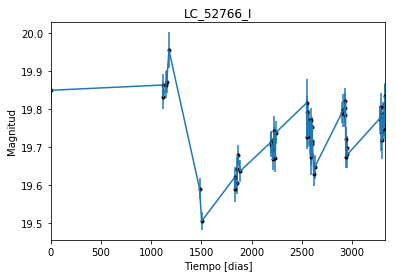

In [2]:
data = np.genfromtxt('LC_52766_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_52766_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

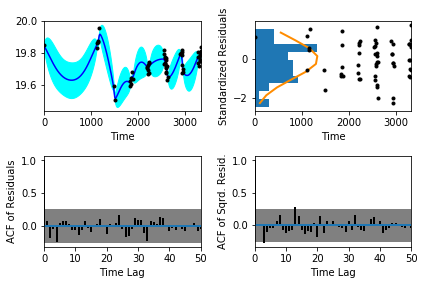

In [5]:
sample.assess_fit()

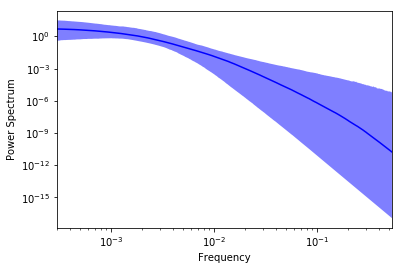

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_52766_I')

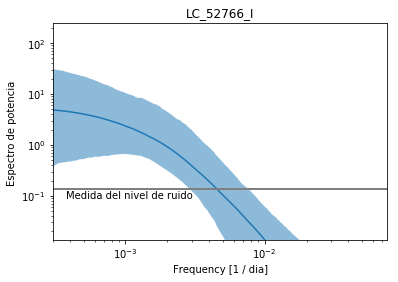

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_52766_I')

Text(0.5,1,'Prediccion , valor esperado LC_52766_I')

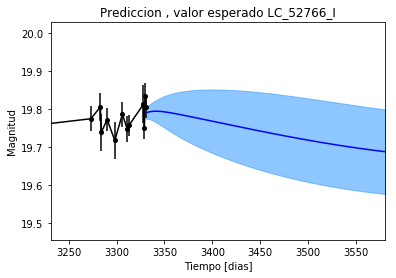

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_52766_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_52766_I')

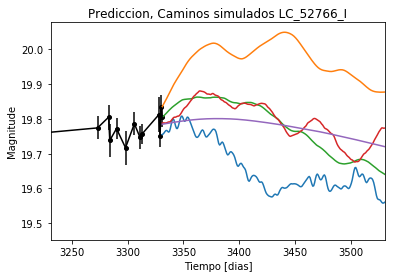

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_52766_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_52766_I')

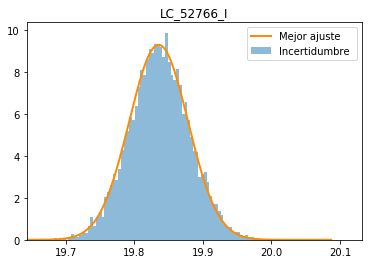

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_52766_I')

Text(0.5,1,'Interpolacion, camino simulado LC_52766_I')

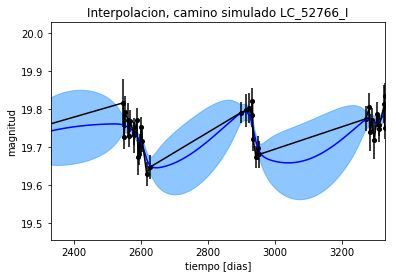

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_52766_I')

Text(0.5,1,'Interpolacion, camino simulado LC_52766_I')

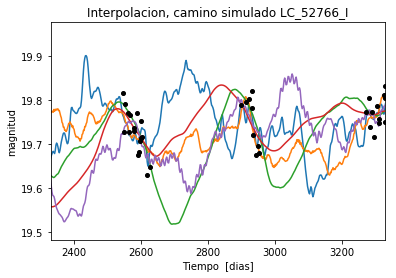

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_52766_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 982.790829114
Median: 0.0126653046424
Standard deviation: 0.200039975994
68% credibility interval: [ 0.00100991  0.18536354]
95% credibility interval: [  3.69162826e-04   7.85599429e-01]
99% credibility interval: [  3.13764582e-04   1.03631822e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 655.397054589
Median: 0.00260312597736
Standard deviation: 0.0881530747283
68% credibility interval: [ 0.00058801  0.02761162]
95% credibility interval: [ 0.00033893  0.2362068 ]
99% credibility interval: [  3.06990451e-04   6.77098036e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 632.440501254
Median: 0.0286377608421
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1288.47737275
Median: 124.083039063
Standard deviation: 1.58319904209
68% credibility interval: [ 122.32773655  125.16941594]
95% credibility interval: [ 119.73870441  125.81203213]
99% credibility interval: [ 117.70680868  126.13562148]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 804.872983315
Median: 0.809500576926
Standard deviation: 2.33275169757
68% credibility interval: [ 0.0717039   4.31851499]
95% credibility interval: [ 0.01809535  7.54573403]
99% credibility interval: [  1.09740883e-02   1.13811358e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 864.730414506
Median: 0.665576708251
Standard deviation: 9.5768682366
68% credibility interval: [ 0.0336945   9.74764299]
95% credibility interval: [  2.00

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 370.420742531
Median: 6.36283432219e-52
Standard deviation: 7.2572184522e+97
68% credibility interval: [  9.73982450e-122   2.59211423e-007]
95% credibility interval: [  5.54952542e-241   7.35209283e+077]
99% credibility interval: [  1.29053768e-250   2.40235913e+098]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2641.34936223
Median: 19.7336626428
Standard deviation: 0.0591931944001
68% credibility interval: [ 19.68746403  19.78638218]
95% credibility interval: [ 19.63201932  19.87147295]
99% credibility interval: [ 19.57193609  19.95177626]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 561.776488437
Median: 0.00690856768213
Standard deviation: 0.259423524124
68% credibility interval: [ 0.          0.39800357]
95% credibility interval: [ 0.          0.91645925]
99% credibility interval: [ 0.          1.03471564]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 561.776488437
Median: 0.00690856768213
Standard deviation: 0.259423524124
68% credibility interval: [ 0.          0.39800357]
95% credibility interval: [ 0.          0.91645925]
99% credibility interval: [ 0.          1.03471564]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 560.659053874
Median: 0.0
Standard deviation: 0.000762693609624
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1288.47737275
Median: 124.083039063
Standard deviation: 1.58319904209
68% credibility interval: [ 122.32773655  125.16941594]
95% credibility interval: [ 119.73870441  125.81203213]
99% credibility interval: [ 117.70680868  126.13562148]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2750.18773819
Median: 0.0155096675574
Standard deviation: 0.0191355970456
68% credibility interval: [ 0.00912154  0.02899529]
95% credibility interval: [ 0.00580073  0.06174548]
99% credibility interval: [ 0.00458779  0.11118495]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1978.03845244
Median: 0.985915794672
Standard deviation: 0.160557589527
68% credibility interval: [ 0.8471542   1.15868421]
95% credibility interval: [ 0.73319492  1.36266693]
99% credibility interval: [ 0.67794824  1.50097789]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 605.622951607
Median: 0.000316797653741
Standard deviation: 0.0930838675132
68% credibility interval: [  3.03671214e-06   9.58037779e-03]
95% credibility interval: [  9.01036161e-82   1.47894766e-01]
99% credibility interval: [  1.45580400e-102   6.64366876e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 982.790829114
Median: (-0.0795784560404+0j)
Standard deviation: 2.05832160941
68% credibility interval: [-1.16467345-4.87334547j -0.00634546-4.17722345j]
95% credibility interval: [ -4.93606679e+00+0.j          -2.31951845e-03-0.00799148j]
99% credibility interval: [ -6.51137941e+00-5.71742919j  -1.97144101e-03-0.02246813j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 655.397054589
Median: (-0.0163559228937+0j)
Standard deviation: 1.7215415156
68% credibility interval: [-0.17348891+2.75810483j -0.00369456+0.j        ]
95% credibility interval: [-1.48413107+1.20787917j -0.00212953+2.47392954j]
99% credibility interval: [ -4.25433243e+00 +6.65788808e+00j  -1.92887789e-03 +1.57322398e-04j]
Posterior summary for paramet